# Python Project: Sales Data Analysis & Visualization

### Libraries Used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1️⃣ Load the Dataset

In [9]:
# Load dataset
df = pd.read_excel("Q1_Sales_Data.xlsx",sheet_name='Sheet1')
df

,Date,Product,Region,CustomerID,Quantity,Sales,Revenue
0,2025-02-16,Printer,East,CUST0065,8,146.77,1174.16
1,2025-03-28,Monitor,South,CUST0032,3,587.17,1761.51
2,2025-03-27,Keyboard,East,CUST0034,2,738.15,1476.30
3,2025-01-02,Printer,West,CUST0092,1,883.87,883.87
4,2025-01-17,Tablet,North,CUST0095,3,742.68,2228.04
...,...,...,...,...,...,...,...
500,2025-03-23,Smartphone,South,CUST0007,8,698.42,5587.36
501,2025-03-08,Tablet,South,CUST0074,4,656.06,2624.24
502,2025-02-26,Printer,South,CUST0052,8,472.72,3781.76
503,2025-02-02,Laptop,West,CUST0079,1,104.45,104.45


In [10]:
# View first few rows
print(df.head())

        Date   Product Region CustomerID  Quantity   Sales  Revenue
0 2025-02-16   Printer   East   CUST0065         8  146.77  1174.16
1 2025-03-28   Monitor  South   CUST0032         3  587.17  1761.51
2 2025-03-27  Keyboard   East   CUST0034         2  738.15  1476.30
3 2025-01-02   Printer   West   CUST0092         1  883.87   883.87
4 2025-01-17    Tablet  North   CUST0095         3  742.68  2228.04


In [11]:
# Check dataset info
print(df.describe())

                                Date    Quantity       Sales      Revenue
count                            505  505.000000  490.000000   490.000000
mean   2025-02-14 09:53:06.534653696    4.936634  551.856755  2708.478571
min              2025-01-01 00:00:00    1.000000  104.450000   104.450000
25%              2025-01-20 00:00:00    2.000000  314.157500  1019.580000
50%              2025-02-16 00:00:00    5.000000  559.740000  2106.935000
75%              2025-03-09 00:00:00    7.000000  763.512500  4010.942500
max              2025-03-31 00:00:00    9.000000  999.470000  8995.230000
std                              NaN    2.664423  261.823925  2067.350600


# 2️⃣ Data Cleaning

### Handle Misssing Values

In [12]:
# Check for missing values in each column of the dataframe
df.isnull().sum()

Date           0
Product        0
Region         0
CustomerID     0
Quantity       0
Sales         15
Revenue       15
dtype: int64

In [16]:
# Fill numerical columns with mean
num_cols = ['Sales','Revenue']
for col in num_cols : 
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with mode
cat_cols = ['Product','Region','CustomerID']
for col in cat_cols :
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
df.isnull().sum()

Date          0
Product       0
Region        0
CustomerID    0
Quantity      0
Sales         0
Revenue       0
dtype: int64

### Covert Date & Extract Month and Year

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year 

In [21]:
df[['Date','Month','Year']]


,Date,Month,Year
0,2025-02-16,2,2025
1,2025-03-28,3,2025
2,2025-03-27,3,2025
3,2025-01-02,1,2025
4,2025-01-17,1,2025
...,...,...,...
500,2025-03-23,3,2025
501,2025-03-08,3,2025
502,2025-02-26,2,2025
503,2025-02-02,2,2025


In [27]:
df.duplicated().sum()

np.int64(5)

In [30]:
df.drop_duplicates()

,Date,Product,Region,CustomerID,Quantity,Sales,Revenue,Month,Year
0,2025-02-16,Printer,East,CUST0065,8,146.770000,1174.16,2,2025
1,2025-03-28,Monitor,South,CUST0032,3,587.170000,1761.51,3,2025
2,2025-03-27,Keyboard,East,CUST0034,2,738.150000,1476.30,3,2025
3,2025-01-02,Printer,West,CUST0092,1,883.870000,883.87,1,2025
4,2025-01-17,Tablet,North,CUST0095,3,742.680000,2228.04,1,2025
...,...,...,...,...,...,...,...,...,...
495,2025-02-11,Mouse,East,CUST0029,3,551.856755,494.64,2,2025
496,2025-01-16,Laptop,North,CUST0049,6,164.130000,984.78,1,2025
497,2025-01-19,Monitor,North,CUST0045,9,110.900000,998.10,1,2025
498,2025-02-14,Smartphone,West,CUST0093,6,960.850000,5765.10,2,2025


# 3️⃣ Summary Statistics

### Mean, Median, Mode, Standard Deviation

In [33]:
summary_stats = df[num_cols].agg(['mean', 'median', 'std'])
print(summary_stats)

# Mode separately
print(df[num_cols].mode())


             Sales      Revenue
mean    551.856755  2708.478571
median  551.856755  2181.440000
std     257.898306  2036.354084
        Sales      Revenue
0  551.856755  2708.478571


### Correlation Matrix + Heatmap

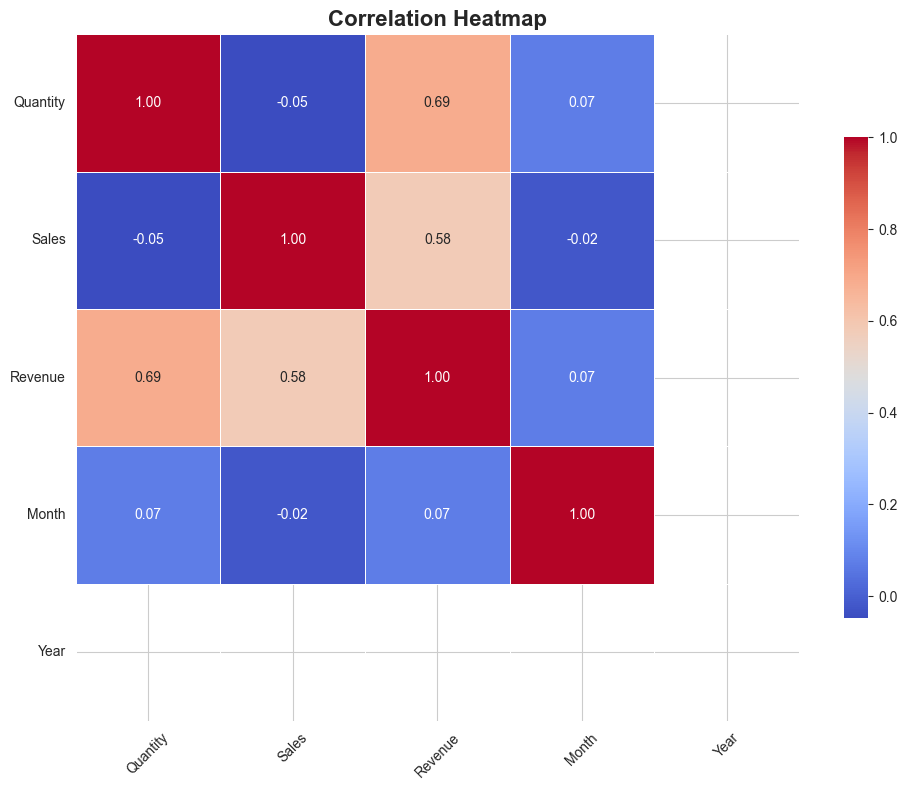

In [146]:

corr = df.corr(numeric_only=True)

# Set Seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))

# Create heatmap
sns.heatmap(
    corr,
    annot=True,                # Show correlation values
    fmt=".2f",                 # Format to 2 decimal places
    cmap="coolwarm",           # Color palette
    linewidths=0.5,            # Line between cells
    linecolor='white',         # Color of lines
    cbar_kws={"shrink": 0.7}  # Colorbar size
)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)        # Rotate x-axis labels
plt.yticks(rotation=0)         # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()

# 4️⃣ Top Performing Prooducts 

### Top 5 Products by Revenue

In [38]:
top_products = (
    df.groupby('Product')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(top_products)

Product
Laptop        239854.385714
Monitor       226049.975714
Printer       199308.367143
Tablet        193852.410000
Smartphone    186931.901429
Name: Revenue, dtype: float64


### Bar Chart

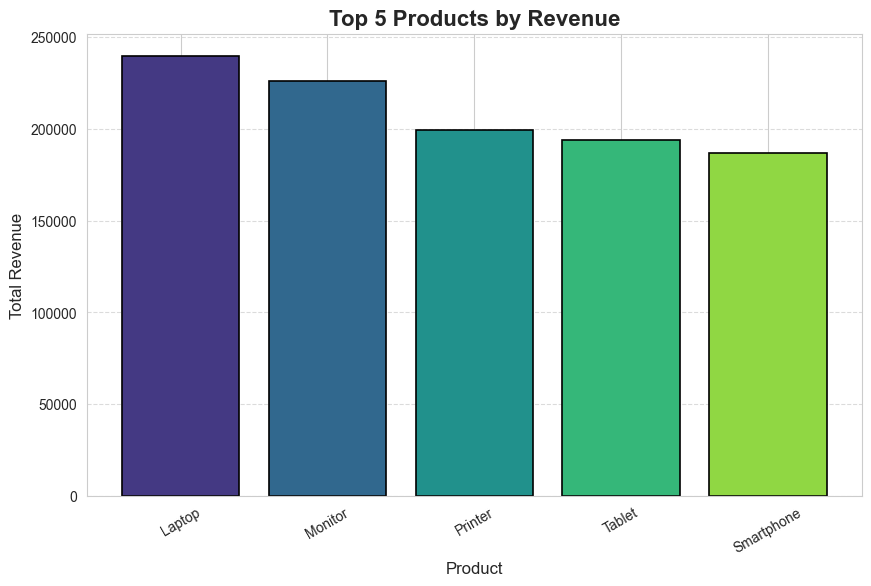

In [130]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

bars = plt.bar(
    top_products.index,            # x-axis
    top_products.values,           # y-axis
    color=sns.color_palette("viridis", len(top_products)),  # Color palette
    edgecolor='black',             # Bar edges
    linewidth=1.2                  # Edge thickness
)

# Add title and labels
plt.title("Top 5 Products by Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=30)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# 5️⃣ Sales Performance Over Time (Q1)

### Monthly Sales Trend

In [43]:
monthly_sales = (
    df[df['Month'].isin([1,2,3])]
    .groupby('Month')['Sales']
    .sum()
)

In [44]:
monthly_sales

Month
1    98673.220265
2    80897.993776
3    99116.447286
Name: Sales, dtype: float64

Text(0, 0.5, 'Total  Sales')

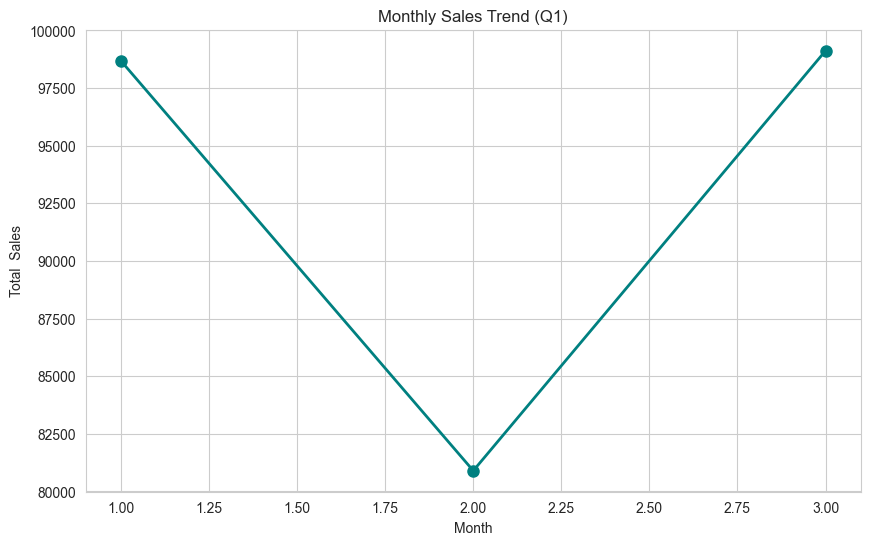

In [149]:
plt.figure(figsize=(10,6))


# Plot the line chart
plt.plot(
    monthly_sales.index,        # x-axis (Month)
    monthly_sales.values,       # y-axis (Sales)
    marker='o',                 # Marker for each point
    color='teal',               # Line color
    linewidth=2,                # Line thickness
    markersize=8                # Marker size
)
plt.title("Monthly Sales Trend (Q1)")
plt.xlabel("Month")
plt.ylabel("Total  Sales")


### Annotate Highest & Lowest Sales

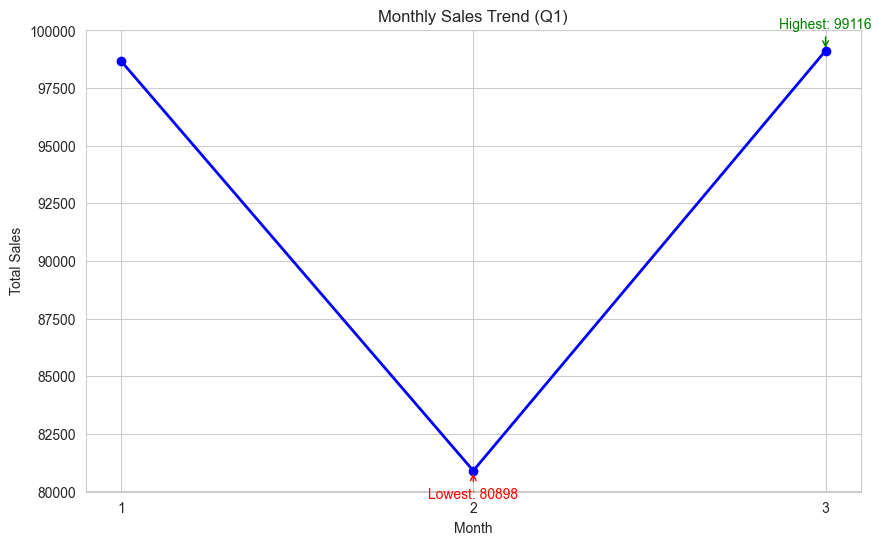

In [137]:
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()
plt.figure(figsize=(10,6))

# Plot monthly sales
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue', linewidth=2)

# Annotate highest sales
plt.annotate(
    f"Highest: {max_value:.0f}",
    xy=(max_month, max_value),
    xytext=(max_month, max_value + max_value*0.01),  # place text above the point
    arrowprops=dict(arrowstyle="->", color='green'),
    color='green',
    ha='center'
)

# Annotate lowest sales
plt.annotate(
    f"Lowest: {min_value:.0f}",
    xy=(min_month, min_value),
    xytext=(min_month, min_value - min_value*0.015),  # place text below the point
    arrowprops=dict(arrowstyle="->", color='red'),
    color='red',
    ha='center'
)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend (Q1)")
plt.grid(True)
plt.xticks(monthly_sales.index)

plt.show()



# 6️⃣ Geographical Insights

### Revenue by Region

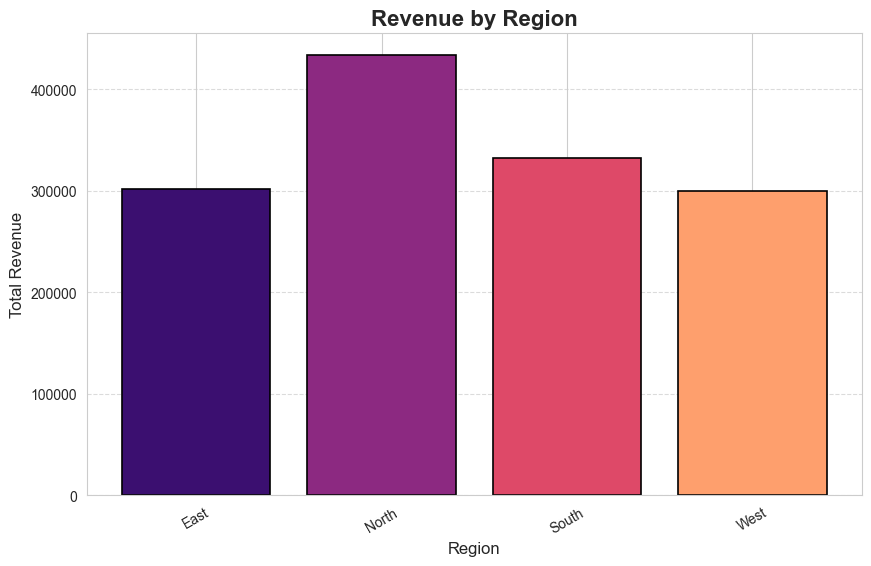

In [157]:
region_revenue = df.groupby('Region')['Revenue'].sum()

plt.figure(figsize=(10,6))

# Create bar chart with customization
bars = plt.bar(
    region_revenue.index,
    region_revenue.values,
    color=sns.color_palette("magma", len(region_revenue)),  # Color palette
    edgecolor='black',
    linewidth=1.2
)

# Add title and axis labels
plt.title("Revenue by Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Add grid lines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)


### Region with Highest Sales 

In [98]:
sales_by_region = df.groupby(by='Region')['Sales'].sum()

top_region_value = sales_by_region.max().round(2)
top_region = sales_by_region.idxmax()

print(f"Top region with highest sales is {top_region} along with {top_region_value} amount.") 

Top region with highest sales is North along with 86140.23 amount.


# 7️⃣ Customer Behavior Analysis

### Purchase Frequency & Average Order Value 

In [118]:
customer_stats = df.groupby('CustomerID').agg(
    PurchaseFrequency = ('CustomerID','count'),
    AvgOrderValue = ('Sales','mean')
)
customer_stats

,PurchaseFrequency,AvgOrderValue
CustomerID,,
CUST0001,7,460.536679
CUST0002,5,486.671351
CUST0003,4,600.132500
CUST0004,6,516.997793
CUST0005,10,386.418000
...,...,...
CUST0096,2,552.255000
CUST0097,8,587.702500
CUST0098,4,557.734189


### Customer categorization

In [123]:
def classify_customer(row):
    if row['PurchaseFrequency'] < 5 :
        return 'Low Value'
    elif row['PurchaseFrequency'] < 10:
        return 'Medium Value'
    else:
        return 'High Value'

customer_stats['CustomerType'] = customer_stats.apply(classify_customer, axis=1)
customer_stats

,PurchaseFrequency,AvgOrderValue,CustomerType
CustomerID,,,
CUST0001,7,460.536679,Medium Value
CUST0002,5,486.671351,Medium Value
CUST0003,4,600.132500,Low Value
CUST0004,6,516.997793,Medium Value
CUST0005,10,386.418000,High Value
...,...,...,...
CUST0096,2,552.255000,Low Value
CUST0097,8,587.702500,Medium Value
CUST0098,4,557.734189,Low Value


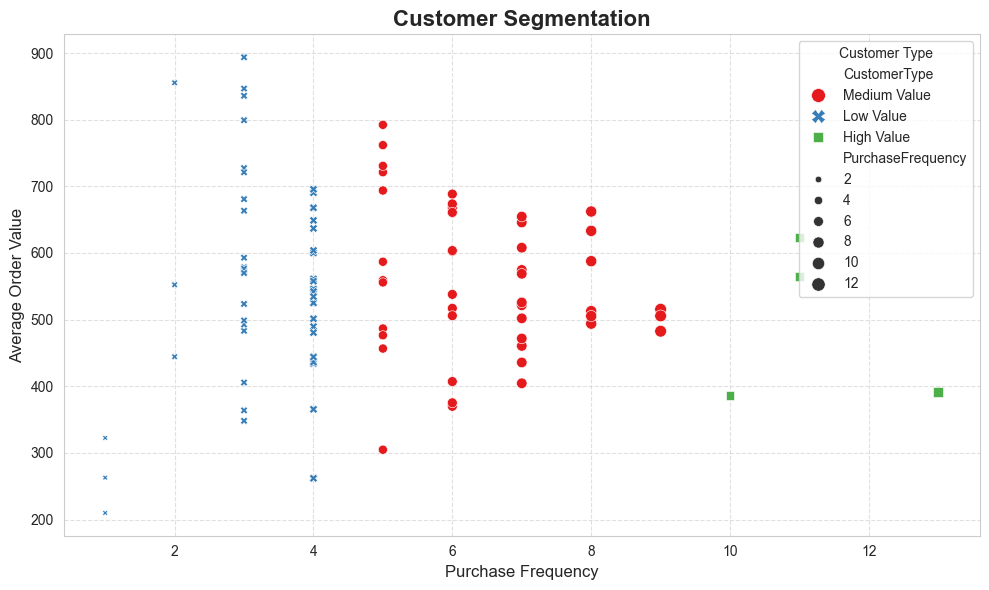

In [163]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=customer_stats,
    x='PurchaseFrequency',
    y='AvgOrderValue',
    hue='CustomerType',     # color by customer type
    style='CustomerType',   # different marker for each type
    s=100,                  # marker size
    palette='Set1',          # color palette
    size = "PurchaseFrequency",
    sizes = (15,100)
    
)

plt.xlabel("Purchase Frequency", fontsize=12)
plt.ylabel("Average Order Value", fontsize=12)
plt.title("Customer Segmentation", fontsize=16, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Customer Type")
plt.tight_layout()
plt.show()
